In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
county_path = "../../Resources/personal_income_by_county.csv"
county_df = pd.read_csv(county_path, encoding="ISO-8859-1")

county_df.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"""00000""",United States,,CAINC1,1.0,...,Personal income (thousands of dollars),Thousands of dollars,791229000,855525000,...,14063283000,14778160000,15467113000,15884741000,16658962000,17514402000,18343601000,19609985000,21392812000,21820248000
1,"""00000""",United States,,CAINC1,2.0,...,Population (persons) 1/,Number of persons,201298000,203798722,...,316735375,319270047,321829327,324367742,326623063,328542157,330233102,331511512,332031554,333287557
2,"""00000""",United States,,CAINC1,3.0,...,Per capita personal income (dollars) 2/,Dollars,3931,4198,...,44401,46287,48060,48971,51004,53309,55547,59153,64430,65470
3,"""01000""",Alabama,5,CAINC1,1.0,...,Personal income (thousands of dollars),Thousands of dollars,9737715,10628318,...,173720680,179487109,187474744,190871820,197963769,205674190,215165840,230872566,252791890,258362172
4,"""01000""",Alabama,5,CAINC1,2.0,...,Population (persons) 1/,Number of persons,3440000,3449846,...,4864399,4886793,4908162,4930595,4952202,4976395,5003418,5031362,5049846,5074296


In [3]:
county_df = county_df.dropna(how = 'any')

In [4]:
county_df = county_df[["GeoName", "Description", "Unit", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]]
cleaned_county_df = county_df.rename(columns={"GeoName" : "Location"})
cleaned_county_df

,Location,Description,Unit,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,United States,Personal income (thousands of dollars),Thousands of dollars,13905749000,14063283000,14778160000,15467113000,15884741000,16658962000,17514402000,18343601000,19609985000,21392812000,21820248000
1,United States,Population (persons) 1/,Number of persons,314344331,316735375,319270047,321829327,324367742,326623063,328542157,330233102,331511512,332031554,333287557
2,United States,Per capita personal income (dollars) 2/,Dollars,44237,44401,46287,48060,48971,51004,53309,55547,59153,64430,65470
3,Alabama,Personal income (thousands of dollars),Thousands of dollars,172101458,173720680,179487109,187474744,190871820,197963769,205674190,215165840,230872566,252791890,258362172
4,Alabama,Population (persons) 1/,Number of persons,4839261,4864399,4886793,4908162,4930595,4952202,4976395,5003418,5031362,5049846,5074296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,Rocky Mountain,Population (persons) 1/,Number of persons,11230078,11386485,11539776,11721767,11915924,12094213,12268132,12427477,12582532,12740434,12864007
9596,Rocky Mountain,Per capita personal income (dollars) 2/,Dollars,41403,42341,44714,46176,46483,48773,51651,54641,58260,64123,67169
9597,Far West,Personal income (thousands of dollars),Thousands of dollars,2501102067,2536151947,2697504923,2886096453,3016423051,3169740963,3339906496,3524619652,3828494482,4179488126,4193955215
9598,Far West,Population (persons) 1/,Number of persons,53650540,54120872,54651324,55207598,55738346,56174005,56477384,56663461,56770093,56467775,56406816


In [5]:
income_df = cleaned_county_df.loc[cleaned_county_df["Unit"] == "Thousands of dollars"]
display(income_df)

,Location,Description,Unit,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,United States,Personal income (thousands of dollars),Thousands of dollars,13905749000,14063283000,14778160000,15467113000,15884741000,16658962000,17514402000,18343601000,19609985000,21392812000,21820248000
3,Alabama,Personal income (thousands of dollars),Thousands of dollars,172101458,173720680,179487109,187474744,190871820,197963769,205674190,215165840,230872566,252791890,258362172
6,"Autauga, AL",Personal income (thousands of dollars),Thousands of dollars,1953500,1966036,2036671,2145869,2222448,2290351,2371211,2478336,2659457,2896204,2951555
9,"Baldwin, AL",Personal income (thousands of dollars),Thousands of dollars,7314284,7534558,7949643,8504769,9032772,9583207,10139295,10879470,11947762,13371784,13984484
12,"Barbour, AL",Personal income (thousands of dollars),Thousands of dollars,758383,799040,796038,826252,813637,818509,842907,874243,926302,1001067,1002082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9585,Plains,Personal income (thousands of dollars),Thousands of dollars,920626244,929356015,966354183,997298288,1010851829,1043303132,1093520202,1133998940,1211726104,1318413111,1364311175
9588,Southeast,Personal income (thousands of dollars),Thousands of dollars,3151999853,3160319696,3326260902,3493964341,3598072267,3786490285,3978126720,4189538276,4480458274,4950934498,5102324248
9591,Southwest,Personal income (thousands of dollars),Thousands of dollars,1613805076,1656654447,1766252947,1800501270,1801518676,1919437059,2046252237,2154931947,2283556459,2528029851,2646114183
9594,Rocky Mountain,Personal income (thousands of dollars),Thousands of dollars,464962214,482115446,515987594,541260671,553886765,589876826,633665021,679051943,733061730,816958516,864062432


In [6]:
desired_states = ["Alabama", "Alaska", "Arizona", "Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

income_by_state = income_df.loc[income_df["Location"].isin(desired_states)]
income_by_state = income_by_state.reset_index(drop = True)


display(income_by_state)

,Location,Description,Unit,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Alabama,Personal income (thousands of dollars),Thousands of dollars,172101458,173720680,179487109,187474744,190871820,197963769,205674190,215165840,230872566,252791890,258362172
1,Alaska,Personal income (thousands of dollars),Thousands of dollars,38997090,38565077,40642115,41918639,41285498,41919375,43522749,44507583,45366320,48207950,50349667
2,Arizona,Personal income (thousands of dollars),Thousands of dollars,236431415,242030312,253711620,267474059,279696749,297261506,315458961,337214074,374311796,409885700,430083534
3,Arkansas,Personal income (thousands of dollars),Thousands of dollars,107007376,107209282,113171547,116632432,119758840,123825419,128970824,131439239,142111663,156361458,160254175
4,California,Personal income (thousands of dollars),Thousands of dollars,1814763034,1840885251,1955718006,2097049575,2191138011,2295048653,2411055136,2537950599,2767521379,3013676929,3006647281
5,Colorado,Personal income (thousands of dollars),Thousands of dollars,236032969,247816736,268453081,279696008,283678694,303366730,328112736,351373238,375157839,417967655,442213009
6,Connecticut,Personal income (thousands of dollars),Thousands of dollars,229133085,223834328,233084021,239184854,243698710,249451101,260582194,267552755,278373604,292370938,300750748
7,Delaware,Personal income (thousands of dollars),Thousands of dollars,40122555,40677771,42422891,44626257,45928401,48077134,51150363,52740700,55338407,59172329,64406597
8,Florida,Personal income (thousands of dollars),Thousands of dollars,794071056,794604073,848535336,905450458,938985637,1011002173,1078010586,1145460767,1221121559,1376879460,1441598918
9,Georgia,Personal income (thousands of dollars),Thousands of dollars,369040241,374124564,398585712,423242013,441039056,467592473,491087953,516552121,552248854,606113593,617552988


In [7]:
desired_years = "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"
average_of_years = []
for year in desired_years:
    income_by_state[year] = pd.to_numeric(income_by_state[year], errors='coerce')
    mean_value = round(income_by_state[year].mean())
    average_of_years.append(mean_value)

display(average_of_years)


[277263334,
 280401384,
 294640720,
 308347425,
 316651008,
 332096067,
 349160126,
 365722174,
 390996127,
 426552129,
 435115504]

In [8]:
average_row = ["Average", "Personal income (thousands of dollars)", "Thousands of dollars", 277263334, 280401384, 294640720, 308347425, 316651008, 332096067, 349160126, 365722174, 390996127,426552129, 435115504]
income_by_state.loc[len(income_by_state)] = average_row
display(income_by_state)

,Location,Description,Unit,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Alabama,Personal income (thousands of dollars),Thousands of dollars,172101458,173720680,179487109,187474744,190871820,197963769,205674190,215165840,230872566,252791890,258362172
1,Alaska,Personal income (thousands of dollars),Thousands of dollars,38997090,38565077,40642115,41918639,41285498,41919375,43522749,44507583,45366320,48207950,50349667
2,Arizona,Personal income (thousands of dollars),Thousands of dollars,236431415,242030312,253711620,267474059,279696749,297261506,315458961,337214074,374311796,409885700,430083534
3,Arkansas,Personal income (thousands of dollars),Thousands of dollars,107007376,107209282,113171547,116632432,119758840,123825419,128970824,131439239,142111663,156361458,160254175
4,California,Personal income (thousands of dollars),Thousands of dollars,1814763034,1840885251,1955718006,2097049575,2191138011,2295048653,2411055136,2537950599,2767521379,3013676929,3006647281
5,Colorado,Personal income (thousands of dollars),Thousands of dollars,236032969,247816736,268453081,279696008,283678694,303366730,328112736,351373238,375157839,417967655,442213009
6,Connecticut,Personal income (thousands of dollars),Thousands of dollars,229133085,223834328,233084021,239184854,243698710,249451101,260582194,267552755,278373604,292370938,300750748
7,Delaware,Personal income (thousands of dollars),Thousands of dollars,40122555,40677771,42422891,44626257,45928401,48077134,51150363,52740700,55338407,59172329,64406597
8,Florida,Personal income (thousands of dollars),Thousands of dollars,794071056,794604073,848535336,905450458,938985637,1011002173,1078010586,1145460767,1221121559,1376879460,1441598918
9,Georgia,Personal income (thousands of dollars),Thousands of dollars,369040241,374124564,398585712,423242013,441039056,467592473,491087953,516552121,552248854,606113593,617552988


In [9]:
income_by_state.drop_duplicates(subset = "Location", keep = 'first', inplace= True)
display(income_by_state)

,Location,Description,Unit,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Alabama,Personal income (thousands of dollars),Thousands of dollars,172101458,173720680,179487109,187474744,190871820,197963769,205674190,215165840,230872566,252791890,258362172
1,Alaska,Personal income (thousands of dollars),Thousands of dollars,38997090,38565077,40642115,41918639,41285498,41919375,43522749,44507583,45366320,48207950,50349667
2,Arizona,Personal income (thousands of dollars),Thousands of dollars,236431415,242030312,253711620,267474059,279696749,297261506,315458961,337214074,374311796,409885700,430083534
3,Arkansas,Personal income (thousands of dollars),Thousands of dollars,107007376,107209282,113171547,116632432,119758840,123825419,128970824,131439239,142111663,156361458,160254175
4,California,Personal income (thousands of dollars),Thousands of dollars,1814763034,1840885251,1955718006,2097049575,2191138011,2295048653,2411055136,2537950599,2767521379,3013676929,3006647281
5,Colorado,Personal income (thousands of dollars),Thousands of dollars,236032969,247816736,268453081,279696008,283678694,303366730,328112736,351373238,375157839,417967655,442213009
6,Connecticut,Personal income (thousands of dollars),Thousands of dollars,229133085,223834328,233084021,239184854,243698710,249451101,260582194,267552755,278373604,292370938,300750748
7,Delaware,Personal income (thousands of dollars),Thousands of dollars,40122555,40677771,42422891,44626257,45928401,48077134,51150363,52740700,55338407,59172329,64406597
8,Florida,Personal income (thousands of dollars),Thousands of dollars,794071056,794604073,848535336,905450458,938985637,1011002173,1078010586,1145460767,1221121559,1376879460,1441598918
9,Georgia,Personal income (thousands of dollars),Thousands of dollars,369040241,374124564,398585712,423242013,441039056,467592473,491087953,516552121,552248854,606113593,617552988


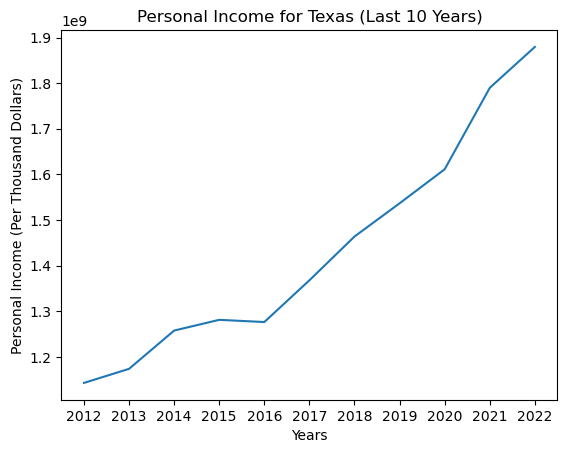

In [10]:
#Need to run to set the index to the location column(Only need to run of first run)
income_by_state = income_by_state.set_index("Location")

state = "Texas"
desired_years = "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"
state_x_axis = desired_years
state_y_axis = income_by_state.loc[state,["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]]


plt.plot(state_x_axis, state_y_axis)
plt.xlabel("Years")
plt.ylabel("Personal Income (Per Thousand Dollars)")
plt.title(f"Personal Income for {state} (Last 10 Years)")
#plt.axes.Axes.set_ylim(("bottom", "top"))
plt.show()

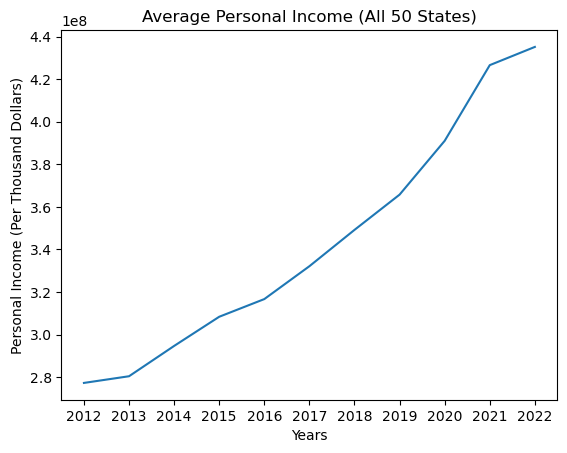

In [11]:
location = "Average"
desired_years = "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"
avg_x_axis = desired_years
avg_y_axis = income_by_state.loc[location,["2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]]


plt.plot(avg_x_axis, avg_y_axis)
plt.xlabel("Years")
plt.ylabel("Personal Income (Per Thousand Dollars)")
plt.title(f"Average Personal Income (All 50 States)")
#plt.axes.set_ylim(("bottom", "top"))
plt.show()

AttributeError: 'list' object has no attribute 'get_label'

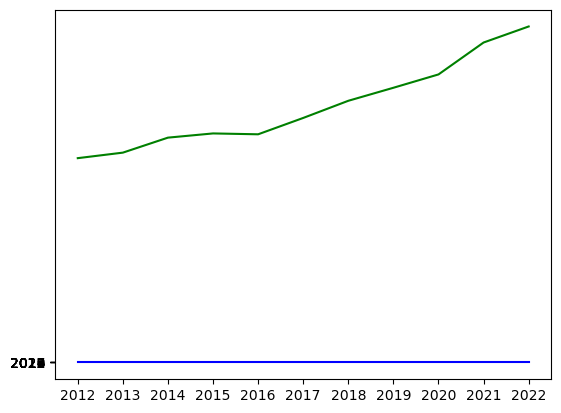

In [12]:
US_average = plt.plot(avg_x_axis, avg_x_axis, color="blue", label="US Average")
state = plt.plot(state_x_axis, state_y_axis, color="green", label = "State")

plt.legend(handles=[US_average, state], loc="best")
plt.ylim(2.8e8, 4.4e8)
plt.xlabel("Years")
plt.ylabel("Personal Income (Per Thousand Dollars)")
plt.title("State vs US Average")
plt.show()